# This Document was build for K - Means 
# <font color='firebrick'> Author: Rick Ou
# <font color='firebrick'>  Version: 1.0
Updated 3/16/2021
Package Used: Panda, sklearn
(Unsupervised Clustering Model)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import cluster
from sklearn.decomposition import PCA

k-means clustering is a very common unsupervised learning technique with a very wide range of applications. It is powerful because it is conceptually relatively simple, scales to very large datasets, and tends to work quite well in practice. 

k-means clustering is an algorithm that tries to find the best way of grouping data points into k different groups, where k is a parameter given to the algorithm. For now, we will choose k arbitrarily. We will revisit how to choose k in practice in the next chapter. The algorithm then works iteratively to try to find the best grouping. There are two steps to this algorithm:

1. The algorithm begins by randomly selecting k points in space to be the centroids of the clusters. Each data point is then assigned to the centroid that it is closest to it.
2. The centroids are updated to be the mean of all of the data points assigned to them. The data points are then reassigned to the centroid closest to them.

Step two is repeated until none of the data points change the centroid they are assigned to after the centroid is updated.

One point to note here is that this algorithm is not deterministic, that is, the outcome of the algorithm depends on the starting locations of the centroids. Therefore, it is not always guaranteed to find the best grouping. However, in practice it tends to find good groupings while still being computationally inexpensive even for large datasets. k-means clustering is fast and easily scalable, and is therefore the most common clustering algorithm used.

## <font color='firebrick'> k-means clustering

In [3]:
# read ageinc.csv data
data = pd.read_csv('ageinc.csv')
data.sample(2)

,income,age
90,32505,59
565,41581,25


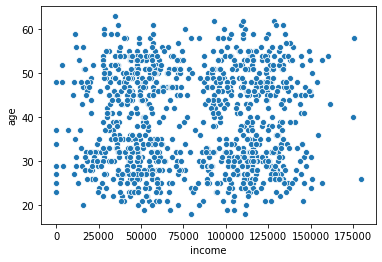

In [103]:
# let's create a scatterplot for income and age

sns.scatterplot(data = data, x = 'income', y = 'age')

In [107]:
# In order to run k-means clustering, we need to standardize the numerical data
data['Z_Income'] = (data['income'] - data.income.mean())/data.income.std()
data['Z_Age'] = (data['age'] - data.age.mean())/data.age.std()


Z_Income    1.0
Z_Age       1.0
dtype: float64

In [108]:
# let's check if the standardization is computed correctly
# we expect the mean of z_income and z_age to be 0, 
# we expect the standard deviation for z_income and z_age to be 1

data[['Z_Income','Z_Age']].std()

Z_Income    1.0
Z_Age       1.0
dtype: float64

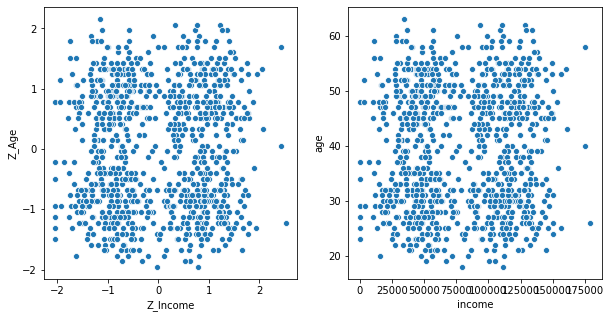

In [113]:
# let's check the scatter plot for the standardized data 
# we see that standardization did not change the structure of the data
fig,ax = plt.subplots(1,2, figsize = (10,5))

sns.scatterplot(data = data,
               x = 'Z_Income',
               y = 'Z_Age',
               ax = ax[0])
sns.scatterplot(data = data,
               x = 'income',
               y = 'age',
               ax = ax[1])

In [115]:
# run k-means clustering

# create a k-means model with 4 clusters (the random_state is needed so that 
# everyone gets the same answer in this notebook because Kmeans clustering is 
# not deterministic). The initial assingment of points as centroids is done randomly
model = cluster.KMeans(n_clusters = 4, random_state = 10)

#fit the created k-means model to our data
model.fit(data[['Z_Income',"Z_Age"]])

KMeans(n_clusters=4, random_state=10)

In [117]:
# the model fit has an attribute called 'labels_' which stores 
# a number that represents the cluster of each point in the dataset
# since we created a k-means model with k=4 (n_clusters), then we will 
# see labels 0, 1, 2, and 3.
model.labels_

array([0, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 0, 0, 2, 3, 3, 1, 2, 1, 3,
       0, 0, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 3, 1, 1, 2, 0, 2, 2, 0, 3,
       3, 3, 0, 0, 3, 1, 3, 2, 0, 1, 2, 1, 1, 1, 3, 1, 0, 2, 3, 3, 1, 3,
       2, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 3, 3, 0, 0, 1, 3, 2, 3, 2, 2, 2,
       2, 3, 2, 1, 2, 3, 1, 1, 3, 2, 2, 2, 1, 3, 2, 0, 2, 1, 3, 2, 2, 2,
       1, 0, 0, 1, 3, 2, 0, 3, 1, 2, 0, 1, 3, 1, 2, 1, 3, 1, 1, 0, 3, 1,
       2, 3, 0, 2, 3, 1, 0, 1, 2, 1, 2, 3, 1, 2, 0, 3, 3, 1, 3, 1, 3, 2,
       1, 1, 3, 1, 3, 0, 0, 3, 0, 3, 0, 1, 1, 0, 3, 1, 3, 2, 3, 0, 2, 2,
       0, 0, 3, 3, 2, 1, 3, 1, 0, 3, 3, 0, 0, 3, 3, 2, 1, 1, 1, 1, 0, 3,
       0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 3, 1, 0, 2,
       3, 3, 1, 3, 3, 0, 2, 1, 2, 0, 0, 2, 0, 3, 1, 3, 1, 0, 1, 0, 0, 2,
       1, 3, 2, 0, 0, 1, 1, 3, 1, 1, 1, 2, 2, 2, 3, 3, 0, 3, 3, 1, 0, 3,
       1, 0, 0, 1, 3, 2, 2, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 2, 0, 3, 1, 3, 2, 3, 0, 1, 3,

In [119]:
# add a cluster column to our dataset
data["cluster"] = model.labels_

,income,age,Z_Income,Z_Age,cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,1
2,36517,52,-1.110474,1.146963,2
3,33223,49,-1.194372,0.873660,2
4,72994,53,-0.181416,1.238064,2


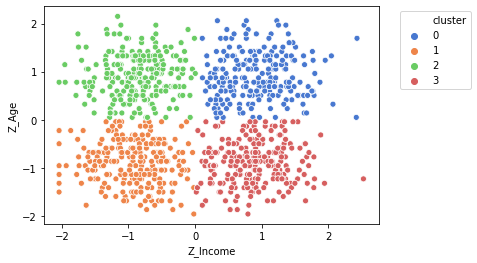

In [123]:
#for colors and palettes
#http://seaborn.pydata.org/tutorial/color_palettes.html

sns.scatterplot(data = data,
               x = 'Z_Income',
               y = 'Z_Age',
               hue = 'cluster',
               palette = 'muted')

plt.legend(bbox_to_anchor = (1.05, 1), loc =2)

#1.05 is away from side 
#1 is away from the top

We see from the plot above that we have 4 segments of customers:

- young with low income (orange)
- young with high income (red)
- old with low income (green)
- old with high income (blue)

## <font color='firebrick'> k-means Clustering on high-dimensional data

It's common to have data that has more than just two dimensions. For example, if in our age and income data we also had yearly spend, we would have three dimensions. If we had some information about how these customers responded to advertised sales, or how many purchases they had made of our products, or how many people lived in their household, we could have many more dimensions.

When we have additional dimensions, it becomes more difficult to visualize our data. In the previous exercise, we only had two variables, and so we could easily visualize data points and the clusters formed. With higher dimensional data, however, different techniques need to be used. Dimensionality reduction techniques are commonly used for this. The idea of dimensionality reduction is that data that is multi-dimensional is reduced, usually to two dimensions, for visualization purposes, while trying to preserve the distance between the points.

We will use principal component analysis (PCA) to perform dimensionality reduction. PCA is a method of transforming the data. It takes the original dimensions and creates new dimensions that capture the most variance in the data. In other words, it creates dimensions that contain the most amount of information about the data, so that when you take the first two principal components (dimensions), you are left with most of the information about the data, but reduced to only two dimensions. 


Perform k-means clustering on the `three_col.csv`:

#### Side note: For loops

#### k-means clustering on high-dimensional data

In [128]:
#read the data
data = pd.read_csv("three_col.csv")
data.sample(3)

,income,age,days_since_purchase
773,42484,35,615
887,101465,30,252
330,44331,31,558


In [138]:
# standardize the data
# now that we have more than 2 columns, it will be exhausting to standaradize each 
# column seperately. Technically, we are doing the same task of standardization 3 times
# and if we have 100 columns, then we will need to do it 100 times. 
# For loops help when we are reapting the same compuation multiple times just as we have hear

# save the column names in a variable called col_names so we can loop on
col_names = data.columns

# create a list of the standardized column names
# z_cols = ['z'+col for col in col_names]

for i in col_names:
    data['z_' + i] = (data[i] - data[i].mean())/data[i].std()

In [139]:
data.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase
0,56432,31,492,-0.606833,-0.748848,0.818321
1,137580,38,551,1.505879,-0.135469,1.349109
2,68285,59,304,-0.298237,1.704668,-0.873001
3,93617,51,507,0.361289,1.003663,0.953267
4,113441,54,509,0.877413,1.266540,0.971260


In [ ]:
# check if we standardize correctly


In [143]:
# perform k-means clustering
model = cluster.KMeans(n_clusters = 4, random_state = 10)
#fit the created k-means model to our data
model.fit(data[['z_income','z_age','z_days_since_purchase']])
data['cluster'] = model.labels_

In [144]:
data.head(5)

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster
0,56432,31,492,-0.606833,-0.748848,0.818321,2
1,137580,38,551,1.505879,-0.135469,1.349109,1
2,68285,59,304,-0.298237,1.704668,-0.873001,0
3,93617,51,507,0.361289,1.003663,0.953267,1
4,113441,54,509,0.877413,1.266540,0.971260,1


**PCA Projection to 2D**

Next, we perform PCA on our data. For this, you need to first import the decomposition module from sklearn, define a PCA object with n_components set to 2, use this PCA object to transform the standardized data, and store the transformed dimensions in pc1 and pc2:


In [147]:
# create a PCA object
pca = PCA(n_components = 2)
# use the PCA object to transform the data 
pc = pca.fit_transform(data[['z_income','z_age','z_days_since_purchase']])

pca_data = pd.DataFrame(data = pc,
                       columns = ['PCA1','PCA2'])

In [149]:
# we can see that both PCAs explain about 68% of the variation in the data
pca.explained_variance_ratio_

array([0.34075065, 0.3359667 ])

In [150]:
# add PCA data to our dataset
data['PCA1'] = pca_data['PCA1']
data['PCA2'] = pca_data['PCA2']

data.sample(2)

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster,PCA1,PCA2
560,84211,25,242,0.116402,-1.274602,-1.430778,3,0.942988,1.625021
606,29094,39,577,-1.318586,-0.047844,1.583015,2,-0.192438,-0.890708


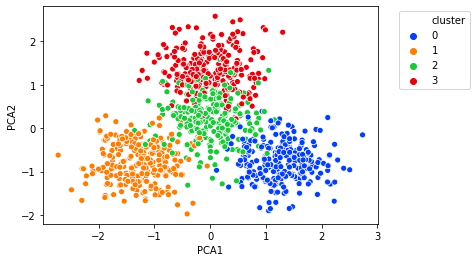

In [154]:
# Stop notebook and create visual inline?
%matplotlib inline

# Visualize 2D Projection
sns.scatterplot(data = data,
               x = 'PCA1',
               y = 'PCA2',
               hue = 'cluster',
               palette = 'bright')

plt.legend(bbox_to_anchor = (1.05, 1), loc =2)


We can investigate what each cluster seems to be capturing, by looking at the means of each of the variables in each cluster:

In [161]:
data[["income",'age','days_since_purchase','cluster']].groupby('cluster').mean().astype(int)

,income,age,days_since_purchase
cluster,,,
0,45002,49,299
1,113118,49,502
2,46153,29,498
3,114704,29,302


We see from the plot above that we have 4 segments of customers:

- 3 young with low income, and long time since purchase (blue)
- 1 old with low income, and short time since purchase (orange)
- 2 old with high income, and long time since purchase (green)
- 0 young with high income, and short time since purchase (red)


<IPython.core.display.Javascript object>


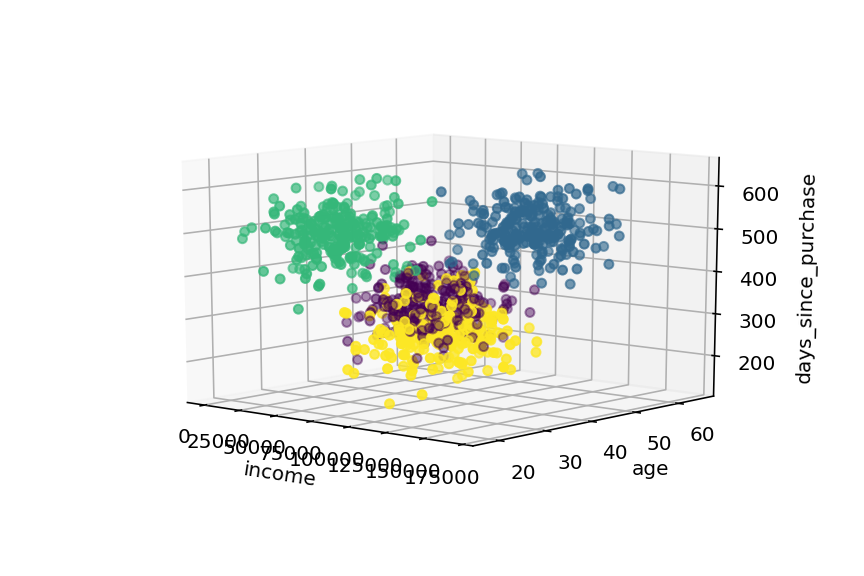

In [179]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(data['income'],
          data['age'],
          data['days_since_purchase'],
           c = data['cluster'],
           marker = 'o')
ax.set_xlabel('income')
ax.set_ylabel('age')
ax.set_zlabel('days_since_purchase')

plt.show()

##  <font color='firebrick'> Choosing the number of clusters based on Visual Inspection

In this exercise, you will apply k-means clustering to age and income data using different numbers of clusters (ranging from two to six), and use visual inspection to evaluate the results.

In [195]:
data = pd.read_csv('ageinc.csv')
data.head(4)

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49


In [184]:
# standardize the data
data['Z_income'] = (data['income'] - data.income.mean())/data.income.std()
data['Z_age'] = (data['age'] - data.age.mean())/data.age.std()
# run k-means clustering
model = cluster.KMeans(n_clusters = 4, random_state = 10)
# fit the created k-means model to our data
data['cluster'] = model.fit_predict(data[['Z_income','Z_age']])
data.head(2)


,income,age,Z_Income,Z_Age,Z_income,Z_age,cluster
0,101743,58,0.550812,1.693570,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,-0.777331,-1.130565,1


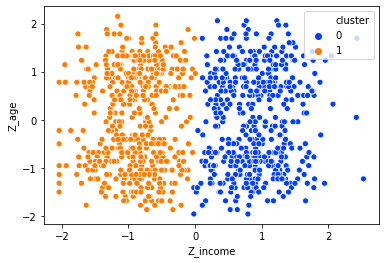

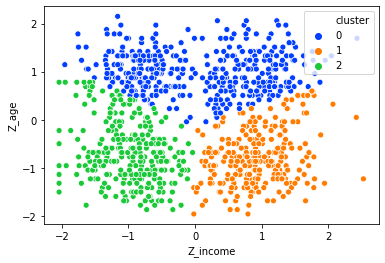

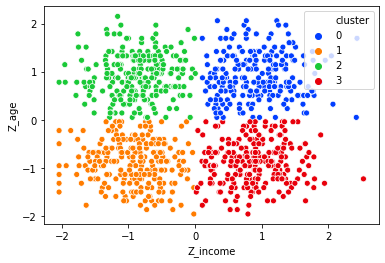

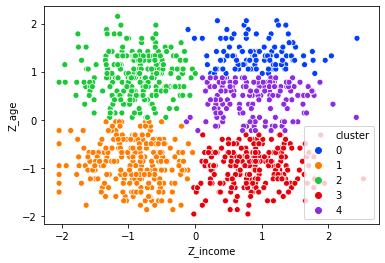

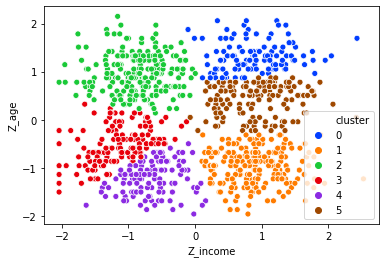

In [187]:
#fig, ax = plt.subplots(2,3, figsize = (10, 5))
%matplotlib inline
for i in range(2,7):
    plt.figure(i)
    model = cluster.KMeans(n_clusters = i, random_state = 10)
    data['cluster'] = model.fit_predict(data[['Z_income','Z_age']])
        
    sns.scatterplot(data = data,
                    x = 'Z_income',
                    y = 'Z_age',
                    hue = 'cluster',
                    palette = 'bright')

By observing the resulting plots, we can see that with too few clusters, we end up with clusters spanning pretty sparse regions in between more densely packed regions. However, with too many, we end up with clusters that border each other but don’t seem separated by a region of sparseness. Therefore, four clusters seem to capture things very well.

##  <font color='firebrick'> Choosing the number of clusters using the Elbow Method

Often, it’s difficult to tell by visualization alone how many clusters should be used for a particular problem. Different people may disagree about the number of clusters to use, and there may not be a clear answer. Furthermore, dimensionality-reduction techniques are not perfect—they attempt to take all the information in multiple dimensions and reduce it to only two. In some cases, this can work well, but as the number of dimensions increases, the data becomes more complex, and these visual methods quickly reach their limitations. When this happens, it’s not easy to determine through visual inspection what the right number of clusters to use is. In these harder cases, it’s often better to reach for a more quantitative measure. One such classic measure is to look for an elbow in a plot of the sum of squared errors.

The sum of squared errors is the sum of the "errors" (difference between a data point and the centroid of its assigned cluster) for all data points, squared. It can be calculated with the following equation:

$SS = \sum\limits_{k}\sum\limits_{x_i \in k} (x_i - \mu_k)^2$


Here, $\mu_k$ is the location of the centroid of cluster k, and each $x_i$ is a data point assigned to cluster k. As we increase k, we should expect the sum of squared errors to decrease since there are more centroids. When plotted together, however, there will often be an "elbow" in the plot, where the "gain" in terms of reduced errors seems to slow for each new cluster. Hence, the plot of the sum of squared errors versus number of clusters (k) will look as follows:

In [196]:
# standardize the data
data['Z_income'] = (data['income'] - data.income.mean())/data.income.std()
data['Z_age'] = (data['age'] - data.age.mean())/data.age.std()
data.head(2)


,income,age,Z_income,Z_age
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565


In [199]:
# We will start with k=2 and compute the Sum of Squares

model = cluster.KMeans(n_clusters = 2,random_state = 10)

clusters = model.fit_predict(data[['Z_income','Z_age']])
data['cluster'] = clusters
centers = model.cluster_centers_
# compute sum of squares
model.inertia_

1189.7476232504305

In [202]:
# now, let's do it for all values of k between 2 and 10

#define an empty list to hold all sum of squares (ss)
ss = []
for i in range(2,11):
    model = cluster.KMeans(n_clusters = i,random_state = 10)
    clusters = model.fit_predict(data[['Z_income','Z_age']])
    data['cluster'] = clusters
    # compute sum of squares
    ss.append(model.inertia_)
    
ss

[1189.7476232504305,
 734.6649696823612,
 386.0702389582007,
 341.6551178805734,
 301.6035411699272,
 271.1661846159643,
 241.90179918137005,
 216.13020539569297,
 192.5686871747537]

Text(0.5, 1.0, 'Elbow Plot')

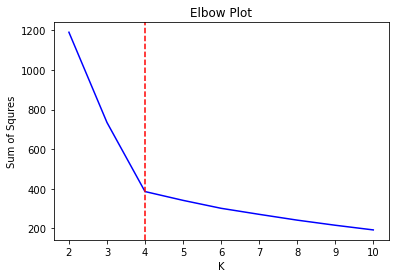

In [211]:
# plot the elbow plot
data = pd.DataFrame({'K':range(2,11),
                   'Sum of Squres':ss})

sns.lineplot(data = data,
            x = 'K',
            y = 'Sum of Squres',
            color = 'blue')

plt.axvline(x = 4, color = 'red', linestyle = '--')
plt.title('Elbow Plot')

By observing the preceding plot, you will notice that there’s a clear elbow in the plot at k=4, so we take that as our best number for k. Prior to that, an additional cluster gives us big gains in reducing the sum of squared errors. Beyond that, we seem to be getting diminishing returns.